**IE 643: Feed Forward Neural Network Demo**

# Importing the basic libaries -

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1000) #to reproduce the same random numbers each time

# **Loading the Data-**

We will be using MNIST Dataset for the classification problem. MNIST dataset contains grayscale images of handwritten digits of the size 28*28. We will be building a neural network to classify these images.

The MNIST database of handwritten digits, has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image.

Source- http://yann.lecun.com/exdb/mnist/

In [2]:
from keras.datasets import mnist

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print(f'Train: X - {X_train.shape}, y - {Y_train.shape}')
print(f'Test: X - {X_test.shape}, y - {Y_test.shape}')

11490434/11490434 [==============================] - 0s 0us/step
Train: X - (60000, 28, 28), y - (60000,)
Test: X - (10000, 28, 28), y - (10000,)


So the shape of X_train gives us the information that we have 60,000 images of size 28x28 pixels


#### Displaying an image from the dataset

In [3]:
digits = np.unique(Y_train)
print(digits)

[0 1 2 3 4 5 6 7 8 9]


In [4]:
#counts for all unique class labels
unique, counts = np.unique(Y_train, return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0 5923]
 [   1 6742]
 [   2 5958]
 [   3 6131]
 [   4 5842]
 [   5 5421]
 [   6 5918]
 [   7 6265]
 [   8 5851]
 [   9 5949]]


# **Pre-processing:**

**Flattening the input values-** Because we are using a simple FFNN, it would be better to convert all the input images of size ${28*28}$ to a size of ${784*1}$ i.e to convert each input from a 2D array to a 1D array.

In [5]:
# flattening the input

X_train_flattened = X_train.reshape((X_train.shape[0], -1))
X_test_flattened = X_test.reshape((X_test.shape[0], -1))

print(f"Shapes - Train: {X_train_flattened.shape}, Test: {X_test_flattened.shape}")

Shapes - Train: (60000, 784), Test: (10000, 784)


**Normalizing input values:**

We often need to normalize the input values into a convinient range. Let us see what is the current range of pixel values:

In [6]:
print("Minimum pixel value =", X_train_flattened.min())
print("Maximum pixel value =", X_train_flattened.max())

Minimum pixel value = 0
Maximum pixel value = 255


As the pixel values lies between the range 0 and 255, we want to normalize the input such that values of the pixels lies in the range (0,1). So, to normalize, we will divide each input values by the maximum pixel value which in this case is 255.

**Normalizing the dataset:**

In [7]:
X_normalized_train = np.round(X_train_flattened/X_train_flattened.max(), 3)
X_normalized_test = np.round(X_test_flattened/X_test_flattened.max(), 3)
#print the new values
print("Minimum pixel value =", X_normalized_train.min())
print("Maximum pixel value =", X_normalized_train.max())

Minimum pixel value = 0.0
Maximum pixel value = 1.0


So, we can see that normalizing does not effect the nature of data. So, we will use this normalized and flattened layer as the input to our neural network.

# **Creating datasets for binary and multiclass classification-**

## **Binary Classification problem-**

MNIST dataset has 10 different target classes, each representing one of the digits from 0-9. Let's consider digits '**0**' and '**1**' for binary classification. We will take only these inputs from the original dataset-

**Creating the dataset-**

In [8]:
#for train data
train_idx = np.where((Y_train==0) | (Y_train==1))# Here we get the index of values 0 and 1
X_train_bin = X_normalized_train[train_idx]
Y_train_bin = Y_train[train_idx]

#for test data
test_idx = np.where((Y_test==0) | (Y_test==1))
X_test_bin = X_normalized_test[test_idx]
Y_test_bin = Y_test[test_idx]

print(f'Trainset shapes - X: {X_train_bin.shape}, Y: {Y_train_bin.shape}')
print(f'Testset shapes - X: {X_test_bin.shape}, Y: {Y_test_bin.shape}')

print(f'\nTrain statistics - 0: {(Y_train_bin==0).sum()}, 1: {(Y_train_bin==1).sum()}')
print(f'Test statistics - 0: {(Y_test_bin==0).sum()}, 1: {(Y_test_bin==1).sum()}')


Trainset shapes - X: (12665, 784), Y: (12665,)
Testset shapes - X: (2115, 784), Y: (2115,)

Train statistics - 0: 5923, 1: 6742
Test statistics - 0: 980, 1: 1135


We now have only 0's and 1's in the newly created subset of the dataset. As we can see that count of 0's and 1's is quite even. So, the dataset is quite evenly balanced.

**Splitting the training dataset-**

Often it is observed that training a model for a large number of epochs leads to the model overfitting very much to the training data set. To tackle this issue, we need a validation dataset to keep track of the 'validation performance'. So, we will now split the current training dataset (of 11344 instances) into a training set and validation set.

In [9]:
from sklearn.model_selection import train_test_split



















We can use this library to split our data.

In general, a split of 90-10, 80-20, 67-33 etc. is used. You can choose your own value as it is always a tradeoff.

We will go with 80-20 split.

In [10]:
X_train_bin, X_val_bin, Y_train_bin, Y_val_bin = train_test_split(X_train_bin, Y_train_bin, test_size=0.2, random_state = 28)

In [11]:
print("Instances in new train-set:", len(Y_train_bin))
print("Instances in val-set:", len(Y_val_bin))
print("\nCount of 0s and 1s in train-set:", (Y_train_bin==0).sum(), (Y_train_bin==1).sum())
print("Count of 0s and 1s in val-set:", (Y_val_bin==0).sum(), (Y_val_bin==1).sum())

Instances in new train-set: 10132
Instances in val-set: 2533

Count of 0s and 1s in train-set: 4745 5387
Count of 0s and 1s in val-set: 1178 1355


In [12]:
# Transpose feature matrices as per our model requirement

X_train_bin, X_val_bin, X_test_bin = X_train_bin.T, X_val_bin.T, X_test_bin.T
print(f'Shapes - {X_train_bin.shape, X_val_bin.shape, X_test_bin.shape}')

Shapes - ((784, 10132), (784, 2533), (784, 2115))


# **Building the Neural Net class:**

In [54]:
class Neural_Network():
    def __init__(self, neurons, Activations, initialization='randn'):
        """Define the NN design parameters
        Args:
            neurons (int array): list of number of neurons in each layer
            Activations (str array): list of activations to be used for hidden and output layers
            initialization (str, optional): Choose weight initialization from
             uniform or normal distribution. Defaults to 'randn'.
        """

        self.inputSize = neurons[0] # Number of neurons in input layer
        self.outputSize = neurons[-1] # Number of neurons in output layer
        self.layers = len(neurons)
        self.weights = [] # weights for each layer
        self.biases = [] # biases in each layer
        self.layer_activations = [] # activations for each layer

        if initialization == 'rand':
            self.initializer = np.random.rand
        elif initialization == 'randn':
            self.initializer = np.random.randn
        else:
           raise ValueError("initialization must be 'rand' or 'randn' or 'he' or 'xavier'")
        for i in range(len(neurons)-1):
            self.weights.append(self.initializer(neurons[i+1],neurons[i])) # weight matrix between layer i and layer i+1
            self.biases.append(self.initializer(neurons[i+1],1))
            self.layer_activations.append(Activations[i]) # activations for each layer


    def sigmoid(self, z):
        """returns result of the sigmoid activation function on input z."""
        return 1 / (1 + np.exp(-z))

    def sigmoidPrime(self,z):
        """returns derivative of sigmoid activation function applied on input z."""
        return self.sigmoid(z) * (1 - self.sigmoid(z))

    def sigma_tanh(self,z):
      return (np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))

    def sigma_tanhPrime(self,z):
      return 4/(np.exp(z)+np.exp(-z))**2

    def SReLU(self,z):
      return z*self.sigma_tanh(np.log(np.exp(z)+1))

    def SReLUPrime(self,z):
      return z*((np.exp(z)+1)**2-1)/((np.exp(z)+1)**2+1)

    def SSIG(self,z):
      return 5*z/(1+abs(5*z))

    def SSIGPrime(self,z):
      return np.where(z > 0, 5 / (1 + 5 * z) ** 2, 5 / (1 - 5 * z) ** 2)

    def linear(self, z):
        """returns result of the linear activation function on input z."""
        return z

    def linearPrime(self, z):
        """returns derivative of linear activation function applied on input z."""
        return 1

    def lossSE(self, predicted, actual):
        """Implementation of Squared-error loss function."""
        return np.mean(0.5*(predicted-actual)**2)

    def lossCE(self, predicted, actual):
        """Implementation of Cross-Entropy loss function."""
        (-1 / actual.shape[1]) * np.sum(np.multiply(actual, np.log(predicted)))



    def forward(self, x):
        """Defines forward pass of the NN

        Args:
            x (array): input of size self.inputSize

        Returns:
            a (array): output of the forward pass
            layer_dot_prod_z (list): layerwise intermediate outputs
            layer_activations_a (list): layerwise activations
        """

        layer_activations_a = [x] # store the outputs of activation
        a=x  ## storing input as activation of zero-th layer
        layer_dot_prod_z = []
        for i, param in enumerate(zip(self.biases, self.weights)):
            b, w = param[0], param[1]

            z = np.dot(w, a) + b
            # print(z.shape)
            if self.layer_activations[i].lower()=='sigmoid':
                a = self.sigmoid(z)
            elif self.layer_activations[i].lower()=='srelu':
                a = self.SReLU(z)
            elif self.layer_activations[i].lower()=='ssig':
                a = self.SSIG(z)
            elif self.layer_activations[i].lower()=='linear':
                a=self.linear(z)

            layer_dot_prod_z.append(z)
            layer_activations_a.append(a)
        return a, layer_dot_prod_z, layer_activations_a

    def backward(self, x, y, zs, activations):
        """backward pass to calculate gradient of loss w.r.t. NN parameters

        Args:
            x (array): input
            y (array): ouputs from forward pass
            zs (list): layerwise intermediate outputs from forward pass
            activations (list): layerwise activations from forward pass

        Returns:
            [tuple]: gradients with respect to bias and weight parameters respectively
        """

        grad_b = [np.zeros(b.shape) for b in self.biases]
        grad_w = [np.zeros(w.shape) for w in self.weights]

        n = zs[-1].shape[1]

        for t in range(1, len(activations)):
            if t == 1:
                delta = (activations[-t] - y)
            else:
                delta = np.dot(self.weights[-t + 1].T, delta)

            if self.layer_activations[-t].lower() == 'sigmoid':
                delta *= self.sigmoidPrime(zs[-t])
            elif self.layer_activations[-t].lower() == 'srelu':
                delta *= self.SReLUPrime(zs[-t])
            elif self.layer_activations[-t].lower() == 'ssig':
                delta *= self.SSIGPrime(zs[-t])
            elif self.layer_activations[-t].lower() == 'linear':
                delta *= self.linearPrime(zs[-t])

            grad_b[-t] = np.sum(delta, axis=1, keepdims=True) / n
            grad_w[-t] = np.dot(delta, activations[-t - 1].T) / n


        return (grad_b, grad_w)

    def update_parameters(self, grads, lr):
        """update the NN parameters using the gradients

        Args:
            grads (list): gradients obtained from backward pass
            lr (float): learning rate of NN
        """

        grad_b, grad_w = grads[0], grads[1]

        for i in range(len(self.weights)):
            self.weights[i] -= lr * grad_w[i]
            self.biases[i] -= lr * grad_b[i]

        # Inside your training loop, after computing gradients:
        # grad_magnitude = [np.linalg.norm(grad_w) for grad_w in grads[1]]  # Gradients for weights
        # print("Gradient Magnitude:", grad_magnitude)

        # Inside your training loop, after computing gradients:
        # grad_magnitude = [np.linalg.norm(grad_w) for grad_w in grads[1]]  # Gradients for weights
        # print("Gradient Magnitude (First 10):", grad_magnitude[:10])  # Print the first 10 gradient magnitudes

        # # Check for NaN values in the gradients
        # nan_indices = [i for i, norm in enumerate(grad_magnitude) if np.isnan(norm)]
        # if nan_indices:
        #     max_nan_to_display = 10  # Maximum number of NaN values to display
        #     print(f"NaN values detected in gradient magnitudes at indices: {nan_indices[:max_nan_to_display]}")  # Print the first 10 NaN indices


        # Inside your training loop, after computing gradients:
        # grad_magnitude = [np.linalg.norm(grad_w) for grad_w in grads[1]]  # Gradients for weights
        # print("Gradient Magnitude (First 10):", grad_magnitude[:10])  # Print the first 10 gradient magnitudes

        # Check for NaN values in the gradients
        # nan_indices = [i for i, norm in enumerate(grad_magnitude) if np.isnan(norm)]
        # if nan_indices:
        #     print(f"NaN values detected in gradient magnitudes at indices: {nan_indices[:10]}")  # Print the first 10 NaN indices


        # threshold = 1e6  # Set a suitable threshold
        # for i, grad_w in enumerate(grads[1]):
        #   if np.linalg.norm(grad_w) > threshold:
        #       print(f"Warning: Exploding Gradient Detected in Layer {i}!")



    def error(self, X, Y, errors):
        """Appends loss to error list"""
        y = np.squeeze(self.forward(X)[0])
        errors.append(self.loss(y, Y))

    def copy_params(self):
        """Returns a copy of current NN parameters"""
        weights = [w.copy() for w in self.weights]
        biases = [b.copy() for b in self.biases]
        return (weights, biases)

    def train(self, X, Y, lr = 1e-3, max_epochs = 1000, patience=5, batch_size = None,
              n_classes=10, onehotencoded=False, loss_func='SE', Xval=None, Yval=None, verbose=True):
        """Function for training our Neural Network

        Args:
            X (ndarray): feature matrix of training data,
             Shape: (n,m) where n is no. of features and m is no. of samples.
            Y (ndarray): ground truth of training data, NOT one-hot-encoded. Shape: (1,m).
            lr (float or function, optional): constant learning rate or scheduler function.
             Defaults to 1e-3 constant lr.
            max_epochs (int, optional): epoch cap for training. Defaults to 1000.
            patience (int, optional): patience parameter for early stopping. Defaults to 5.
            batch_size (int, optional): mini-batch size. Defaults to full-batch GD if not provided.
            n_classes (int, optional): no. of classes for multi-class classification required if
            one-hot encoding is set to True. Defaults to 10.
            onehotencoded (bool, optional): Defaults to False.
            loss_func (str, optional): Choose from 'SE' and 'CE' loss functions. Defaults to 'SE'.
            Xval (ndarray, optional): Validation data feature matrix. Defaults to None.
            Yval (ndarray, optional): Validation data ground truth. Defaults to None.
            verbose (bool, optional): If True, displays logs and progress of training. Defaults to True.

        Returns:
            [list/tuple]: lists of train-set and validation-set losses seen over the traning process.
        """

        if onehotencoded:
            # a method for creating one hot encoded labels
            def onehotencoding(Y, n):
                # one-hot encoding of class i is just the ith column of the identity
                # matrix of size n where n is the total number of classes. so below
                # code uses Y (a 1d array) for indexing into the identity matrix.

                m = Y.shape[1]
                onehot_encoded = np.zeros((n, m))
                for i in range(m):
                    onehot_encoded[Y[0, i], i] = 1
                return onehot_encoded
                # raise NotImplementedError


            Y = onehotencoding(Y, n_classes)
            if Yval is not None:
                Yval = onehotencoding(Yval, n_classes)

        # Below code ensures that Y is 2-dimensional even when one-hot encoding is not
        # performed, so our same code works for training NN for both tasks.
        Y = np.expand_dims(Y,0) if len(Y.shape) == 1 else Y
        Yval = np.expand_dims(Yval,0) if (Yval is not None and len(Yval.shape) == 1) else Yval

        if loss_func == 'SE':
            self.loss = self.lossSE
        elif loss_func == 'CE':
            self.loss = self.lossCE

        train_errors=[]
        if Xval is not None:
            val_errors=[]
        i, j, v = 0, 0, np.inf     ## i -> epoch, j->patience, v ->best loss
        best_params = self.copy_params()

        if batch_size is not None:
            if batch_size > len(X[0]):
                raise ValueError("invalid mini-batch size. Must be smaller than dataset length")
        else:   ## if batch_size is not given
            batch_size = len(X[0])

        #LR control function

        if isinstance(lr, (float, int)):# constant Ir arg is passed to train get_ir lambda x: 1r # we return a function object which returns the same ir at every epoc elif callable(lr): # function in arg is passed to train
           get_lr =lambda X: lr # the function is then used to get in for a particular epoch else: raise ValueError('param Ir can only be a number or a scheduler function")
        elif callable(lr):
          get_lr =lr
        else:
          raise ValueError('param lr can only be a number or a scheduler function')


        v = float('inf')
        while j < patience:

            # Shuffle Dataset
            idx = np.arange(len(X[0]))
            np.random.shuffle(idx)
            X1 = np.take(X,idx,axis=-1)
            Y1 = np.take(Y,idx,axis=-1)

            for q in range(0,len(X1[0]),batch_size):
                start, end = q, min(len(X1[0]), q+batch_size)
                train_x = X1[:, start:end]
                train_y = Y1[:,start:end]
                out, dot_prod_z, activations_a = self.forward(train_x)
                grads = self.backward(train_x, train_y, dot_prod_z, activations_a) # find the gradients using backward pass



                self.update_parameters(grads, lr)
            i += 1 # increment epoch count

            self.error(X, Y, train_errors)   ### appending the loss to train_errors
            if Xval is not None and Yval is not None:
                self.error(Xval, Yval, val_errors)    ## appending the val_loss to errors

                if val_errors[-1] < v:
                    j = 0 # reset patience counter
                    v = val_errors[-1] # update best loss
                    best_params = self.copy_params() # save params
                else:
                    j += 1 # increment patience counter

            if verbose and i%5 == 0:
                log = f"Epoch {i}..............Loss on train = {train_errors[-1]}"
                if Xval is not None:
                    log += f", Loss on val = {val_errors[-1]}"
                print(log)

            if i >= max_epochs:
                break # stop if epoch threshold crossed

        if Xval is not None:
            if i >= max_epochs and verbose:
                print("Reached Epoch Cap without convergence....Terminating")
            elif verbose:
                print("Early Stopping .............. Returning best weights")

            self.weights, self.biases = best_params # reset to best params

        if verbose:
            x = np.arange(1, len(train_errors)+1)
            plt.plot(x, train_errors, label="Loss on Train")
            if Xval is not None:
                plt.plot(x, val_errors, label="Loss on Val")
            plt.legend()
            plt.title(f"{loss_func} - Learning Rate = {lr}")
            plt.xlabel("Epoch")
            plt.ylabel("Loss")
            plt.show()
        if Xval is not None:
            return (train_errors, val_errors)
        return train_errors

    def predict(self, x):
      out, dot_prod_z, activations_a = self.forward(x)
      return out > 0.5


**Creating a MLP (Feed forward NN) model instance for our Binary classification task :**

Let's now create a simple feed-forward neural network.

* Number of input neurons = 784.
* Number of output layer neurons = 1.

The number of hidden layers and number of neurons in each hidden layer can be decided by the user.

In [42]:
#D_in is input dimension
#H1 is dimension of first hidden layer
#H2 is dimension of second hidden layer
#D_out is output dimension.

D_in, H1, H2, D_out = 784, 200, 100, 1 #You can add more layers or more outputs if you wish.

neurons = [D_in, H1, H2, D_out] # list of number of neurons in the layers sequentially.
activation_functions = ['SRELU','SRELU','sigmoid'] # activations in each layer (Note: the input layer does not have any activation)
nn_bin = Neural_Network(neurons, activation_functions) # There we go, creating our neural network.

## Training the model:

<ipython-input-41-08141031f944>:32: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-41-08141031f944>:48: RuntimeWarning: overflow encountered in square
  return z*((np.exp(z)+1)**2-1)/((np.exp(z)+1)**2+1)
<ipython-input-41-08141031f944>:48: RuntimeWarning: invalid value encountered in divide
  return z*((np.exp(z)+1)**2-1)/((np.exp(z)+1)**2+1)


Epoch 5..............Loss on train = nan, Loss on val = nan
Early Stopping .............. Returning best weights


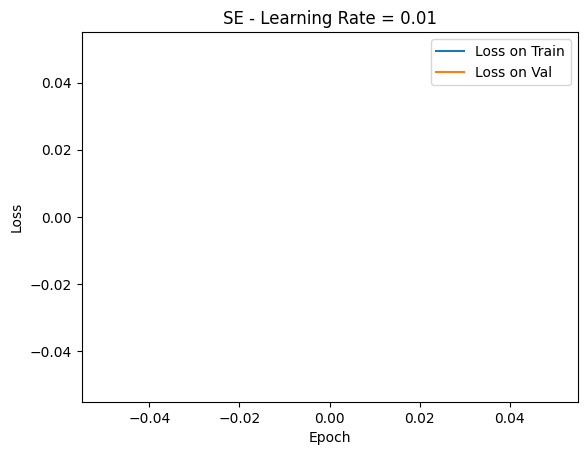

In [43]:
losses = nn_bin.train(X_train_bin, Y_train_bin, batch_size=10, lr=1e-2, max_epochs=100, Xval = X_val_bin, Yval = Y_val_bin, verbose= True)

From the **overflow error** we can conclude that the gradient is **exploding**. Monitoring the gradient values, we can confirm that the values were reaching very high numbers and potentially infinity thus we were getting NaN. The gradient values have not been displayed because there were very a lot of values to display so the display was getting truncated to the last 5000 lines which were all NaN values but manual inspection of the initial values showed very high numbers. The e^z term in the SReLU activation would be causing this behaviour.


##Testing the model with SReLU activation:
Now it's the time to test our model:

In [20]:
print("First 10 outputs    :", Y_test_bin[:10])
preds = nn_bin.predict(X_test_bin[:,:10])
print("First 10 predictions:", preds)

First 10 outputs    : [1 0 1 0 0 1 0 0 1 1]
First 10 predictions: [[ True False  True False False False False False False False]]


<ipython-input-13-b92d47e5e26a>:32: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Now it's time to check the accuracy of our model on the entire dataset:

In [21]:
Y_pred_bin = nn_bin.predict(X_test_bin)
Y_pred_bin=Y_pred_bin.flatten()

<ipython-input-13-b92d47e5e26a>:32: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


##Checking the accuracy:
You can write a simple code manually to calculate the accuracy of model by counting the number of correct predictions. However there are tools available to make it easier.

In [44]:

accuracy= (Y_pred_bin == Y_test_bin).mean()
print("Model accuracy =", round(accuracy*100,2),"%")

Model accuracy = 52.58 %


##Checking with the SSIG functions instead of SReLU functions

In [45]:
#D_in is input dimension
#H1 is dimension of first hidden layer
#H2 is dimension of second hidden layer
#D_out is output dimension.

D_in, H1, H2, D_out = 784, 200, 100, 1 #You can add more layers or more outputs if you wish.

neurons = [D_in, H1, H2, D_out] # list of number of neurons in the layers sequentially.
activation_functions = ['SSIG','SSIG','sigmoid'] # activations in each layer (Note: the input layer does not have any activation)
nn_bin = Neural_Network(neurons, activation_functions) # There we go, creating our neural network.

##Training the model

Epoch 5..............Loss on train = 0.016609022471627696, Loss on val = 0.021218129584283592
Epoch 10..............Loss on train = 0.009305480593751105, Loss on val = 0.013772838210117365
Epoch 15..............Loss on train = 0.007084270602219327, Loss on val = 0.01163504829465471
Epoch 20..............Loss on train = 0.0059835351723276356, Loss on val = 0.009829368551554009
Epoch 25..............Loss on train = 0.005179115524640122, Loss on val = 0.00917697349667625
Epoch 30..............Loss on train = 0.004505953325303171, Loss on val = 0.008546070297599125
Epoch 35..............Loss on train = 0.00420146501396685, Loss on val = 0.007954069570795598
Epoch 40..............Loss on train = 0.003878683978446288, Loss on val = 0.007588947180961321
Epoch 45..............Loss on train = 0.0035336213127760314, Loss on val = 0.00721048951500496
Epoch 50..............Loss on train = 0.00332857691425509, Loss on val = 0.00696858021733053
Epoch 55..............Loss on train = 0.003124320663554

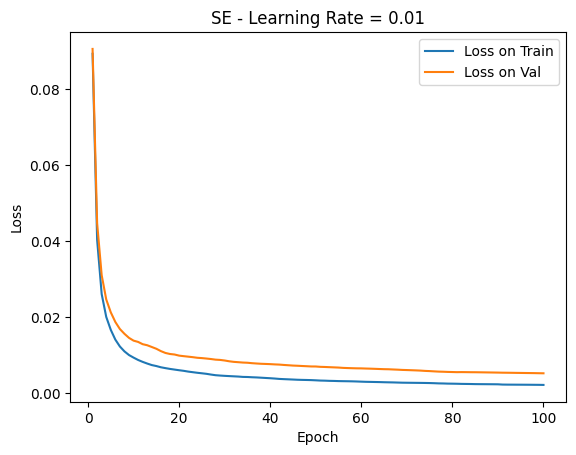

In [46]:
losses = nn_bin.train(X_train_bin, Y_train_bin, batch_size=10, lr=1e-2, max_epochs=100, Xval = X_val_bin, Yval = Y_val_bin, verbose= True)

The models on training with the SSIG activation function did not show any vanishing or exploding behaviour

##Checking the accuracy:

In [47]:
Y_pred_bin = nn_bin.predict(X_test_bin)
Y_pred_bin=Y_pred_bin.flatten()
accuracy= (Y_pred_bin == Y_test_bin).mean()
print("Model accuracy =", round(accuracy*100,2),"%")

Model accuracy = 98.68 %


##Confusion Matrix:


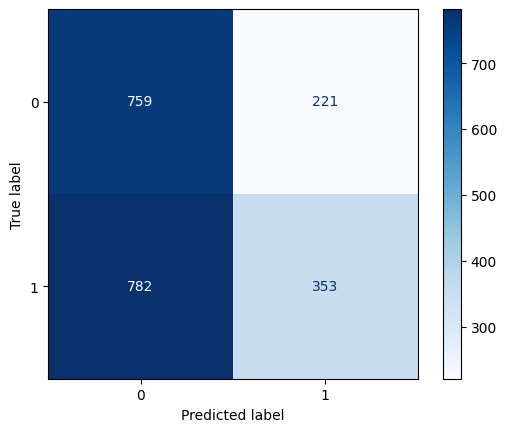

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

matrix_bin = confusion_matrix(Y_test_bin, Y_pred_bin)
ConfusionMatrixDisplay(matrix_bin, display_labels=[0,1]).plot(cmap="Blues", values_format='')
plt.show()

##Using a linear activation function at the output layer and SReLU for other layers:

In [55]:
D_in, H1, H2, D_out = 784, 200, 100, 1 #You can add more layers or more outputs if you wish.

neurons = [D_in, H1, H2, D_out] # list of number of neurons in the layers sequentially.
activation_functions = ['SRELU','SRELU','linear'] # activations in each layer (Note: the input layer does not have any activation)
nn_bin = Neural_Network(neurons, activation_functions) # There we go, creating our neural network.


<ipython-input-54-5a88abcf3590>:48: RuntimeWarning: overflow encountered in square
  return z*((np.exp(z)+1)**2-1)/((np.exp(z)+1)**2+1)
<ipython-input-54-5a88abcf3590>:48: RuntimeWarning: invalid value encountered in divide
  return z*((np.exp(z)+1)**2-1)/((np.exp(z)+1)**2+1)


Epoch 5..............Loss on train = nan, Loss on val = nan
Early Stopping .............. Returning best weights


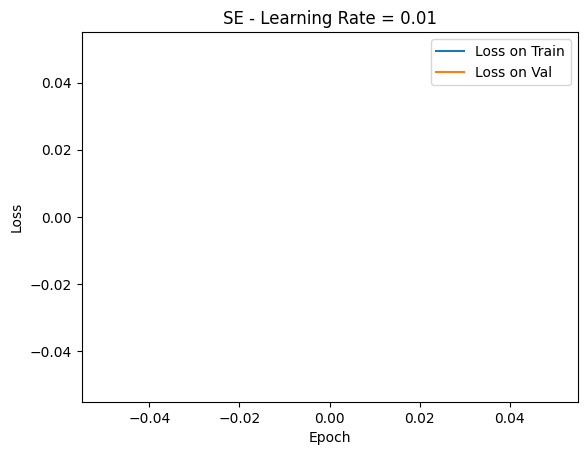

In [56]:
losses = nn_bin.train(X_train_bin, Y_train_bin, batch_size=10, lr=1e-2, max_epochs=100, Xval = X_val_bin, Yval = Y_val_bin, verbose= True)

We again encounter the exploding problem even with the linear activation at the end

##Using a linear activation function at the output layer and SSIG for other layers:

Epoch 5..............Loss on train = 0.01937629637521647, Loss on val = 0.022117888342412902
Epoch 10..............Loss on train = 0.011445559540830715, Loss on val = 0.014046616158961816
Epoch 15..............Loss on train = 0.009657588096865004, Loss on val = 0.012234304641205111
Epoch 20..............Loss on train = 0.009399507097385204, Loss on val = 0.011851848494130972
Epoch 25..............Loss on train = 0.008373962074719172, Loss on val = 0.010579030604670272
Epoch 30..............Loss on train = 0.008379428673066723, Loss on val = 0.010756828018603433
Epoch 35..............Loss on train = 0.007443743819658688, Loss on val = 0.009892513390832908
Epoch 40..............Loss on train = 0.007603894361037697, Loss on val = 0.00996995034579163
Early Stopping .............. Returning best weights


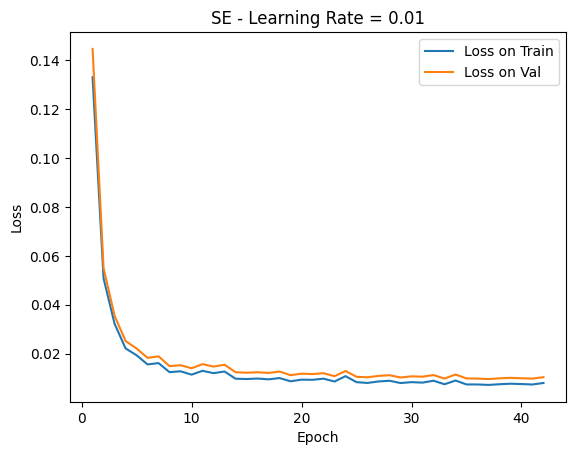

In [57]:
D_in, H1, H2, D_out = 784, 200, 100, 1 #You can add more layers or more outputs if you wish.

neurons = [D_in, H1, H2, D_out] # list of number of neurons in the layers sequentially.
activation_functions = ['SSIG','SSIG','linear'] # activations in each layer (Note: the input layer does not have any activation)
nn_bin = Neural_Network(neurons, activation_functions) # There we go, creating our neural network.
losses = nn_bin.train(X_train_bin, Y_train_bin, batch_size=10, lr=1e-2, max_epochs=100, Xval = X_val_bin, Yval = Y_val_bin, verbose= True)

The model with SSIG activations for the internal layers and Linear activation at the output perform better than the model with the Logistic Sigmoid at the output